In [3]:
import os

print(os.listdir("training_set/Dog"))

['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg', '10000.jpg', '10001.jpg', '10002.jpg', '10003.jpg', '10004.jpg', '10005.jpg', '10006.jpg', '10007.jpg', '10008.jpg', '10009.jpg', '1001.jpg', '10010.jpg', '10011.jpg', '10012.jpg', '10013.jpg', '10014.jpg', '10015.jpg', '10016.jpg', '10017.jpg', '10018.jpg', '10019.jpg', '1002.jpg', '10020.jpg', '10021.jpg', '10022.jpg', '10023.jpg', '10024.jpg', '10025.jpg', '10026.jpg', '10027.jpg', '10028.jpg', '10029.jpg', '1003.jpg', '10030.jpg', '10031.jpg', '10032.jpg', '10033.jpg', '10034.jpg', '10035.jpg', '10036.jpg', '10037.jpg', '10038.jpg', '10039.jpg', '1004.jpg', '10040.jpg', '10041.jpg', '10042.jpg', '10043.jpg', '10044.jpg', '10045.jpg', '10046.jpg', '10047.jpg', '10048.jpg', '10049.jpg', '1005.jpg', '10050.jpg', '10051.jpg', '10052.jpg', '10053.jpg', '10054.jpg', '10055.jpg', '10056.jpg', '10057.jpg', '10058.jpg', '10059.jpg', '1006.jpg', '10060.jpg', '10061.jpg', '10062.jpg', '10063.jpg', '10064.jpg', '10065.jpg', '10066.jpg', '1006

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

# import helper  # helper function is defined below, no need for importing

In [5]:
import torch 
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms ,datasets

In [7]:
batch_size = 32

transform = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor()])

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       normalize]) 

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      normalize])

train_dataset = datasets.ImageFolder('training_set',train_transforms)
test_dataset = datasets.ImageFolder('test_set',test_transforms)

train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

train_dataset = datasets.ImageFolder('training_set',train_transforms)
test_dataset = datasets.ImageFolder('test_set',test_transforms)

train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=batch_size,shuffle=False)


for images, labels in train_loader:
    print(labels[0])
    print(images[0])
    break

tensor(1)
tensor([[[-0.0116, -0.0972, -0.1999,  ..., -2.1179, -2.1179, -2.1179],
         [-0.1486, -0.1828, -0.2171,  ..., -2.1179, -2.1179, -2.1179],
         [-0.1657, -0.2171, -0.2342,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-0.9877, -0.9705, -0.9877,  ...,  0.7077,  0.3138, -2.1179],
         [-0.9534, -0.9534, -0.9705,  ...,  0.8961,  0.4679, -2.1179],
         [-0.9363, -0.9363, -0.9534,  ...,  1.0159,  0.7419, -2.1179]],

        [[ 0.1527,  0.0651, -0.0574,  ..., -2.0357, -2.0357, -2.0357],
         [ 0.0651,  0.0126, -0.0399,  ..., -2.0357, -2.0357, -2.0357],
         [ 0.0826,  0.0126, -0.0224,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-0.8803, -0.8627, -0.8627,  ...,  0.7479,  0.3452, -2.0357],
         [-0.8452, -0.8452, -0.8627,  ...,  0.9405,  0.5028, -2.0357],
         [-0.8277, -0.8277, -0.8452,  ...,  1.0630,  0.7829, -2.0357]],

        [[ 0.2871,  0.1999,  0.0779,  ..., -1.8044, -1.8044, -1.8044],
         [ 0.1825,  0.1476,  0.0953

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7411594..2.64].


tensor(1)
tensor([[[ 2.2489,  2.2489,  2.2489,  ..., -0.1828, -0.1828, -0.1486],
         [ 2.2489,  2.2489,  2.2489,  ..., -0.2856, -0.3027, -0.1657],
         [ 2.2318,  2.2318,  2.2147,  ..., -0.3198, -0.3369, -0.2513],
         ...,
         [ 1.7180,  1.7523,  1.8208,  ...,  0.1768,  0.2282,  0.1939],
         [ 1.7523,  1.8208,  1.8893,  ...,  0.1768,  0.2282,  0.1768],
         [ 1.7865,  1.7865,  1.8893,  ...,  0.1768,  0.2111,  0.1597]],

        [[ 2.4286,  2.4286,  2.4286,  ..., -0.0574, -0.0574, -0.0224],
         [ 2.4286,  2.4286,  2.4286,  ..., -0.1625, -0.1800, -0.0399],
         [ 2.4111,  2.4111,  2.3936,  ..., -0.1975, -0.2150, -0.1275],
         ...,
         [ 1.9559,  1.9909,  2.0434,  ..., -0.4251, -0.3725, -0.4076],
         [ 1.8859,  1.9559,  2.0609,  ..., -0.4251, -0.3725, -0.4251],
         [ 1.9209,  1.9209,  2.0259,  ..., -0.4251, -0.3901, -0.4426]],

        [[ 2.6051,  2.6051,  2.6051,  ...,  0.1999,  0.1999,  0.2348],
         [ 2.6051,  2.6051,  2.6051

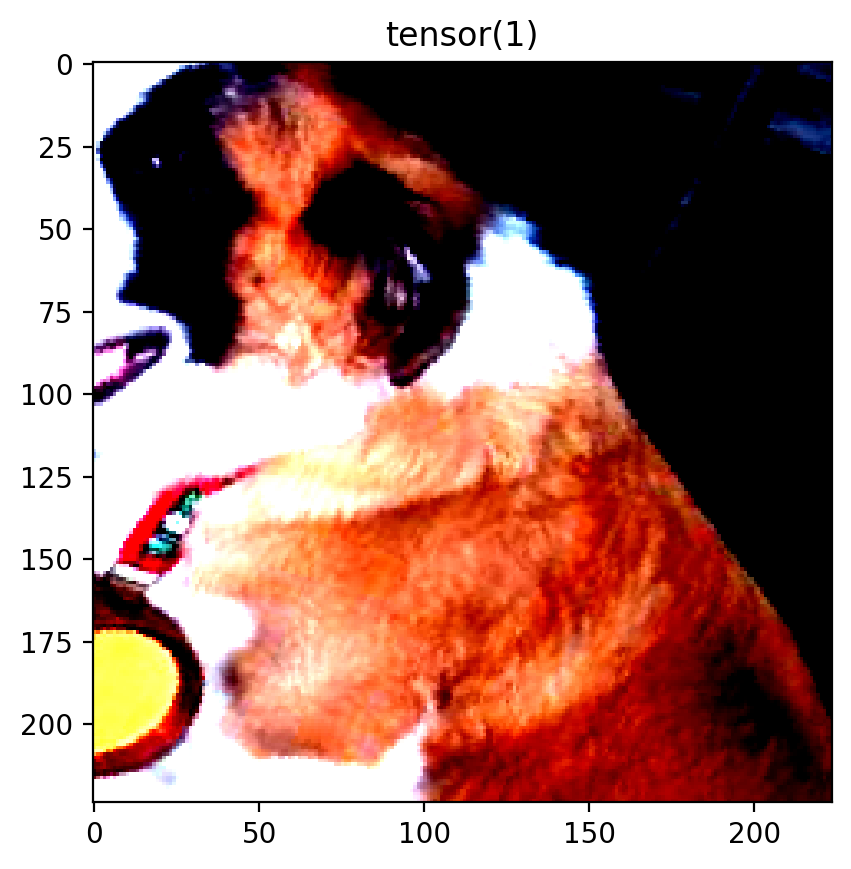

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

for images, labels in train_loader:
    print(labels[0])
    print(images[0])
    break

image = cv2.cvtColor(np.transpose((images[0,:,:,:]).numpy(),(1,2,0)), cv2.IMREAD_GRAYSCALE)
fig2, ax2 = plt.subplots()
ax2.imshow(image)
ax2.set_title(str(labels[0]))
plt.show()

In [ ]:
# Run this to test your data loader
images, labels = next(iter(dataloader))
# helper.imshow(images[0], normalize=False)
imshow(images[0], normalize=False)

In [ ]:
# change this to the trainloader or testloader 
data_iter = iter(testloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
#     helper.imshow(images[ii], ax=ax, normalize=False)
    imshow(images[ii], ax=ax, normalize=False)